##  Homework 4 - Problem 2 : Convolutional networks for CIFAR10


### Student: Dimitrios Tanoglidis

In [1]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical 

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

//anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


### a) Import CIFAR-10 data set and display images

In [7]:
data_train = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW4/CIFAR_10.npy"))
data_test = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW4/CIFAR_10_test.npy"))
labels_train = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW4/CIFAR_labels.npy"))
labels_test = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW4/CIFAR_labels_test.npy"))


# Concatenate
X = (np.concatenate((data_train,data_test)))/255.
Y = to_categorical(np.concatenate((labels_train,labels_test)))

# Split in train, validation, test set
train_set = (X[:50000], Y[:50000])
val_set = (X[50000:60000], Y[50000:60000])
test_set = (X[60000:70000], Y[60000:70000])

# Get a subsample of the training set to make it fast /keep 20000 samples
train_fast = (X[:10000], Y[:10000])

Let's display some images

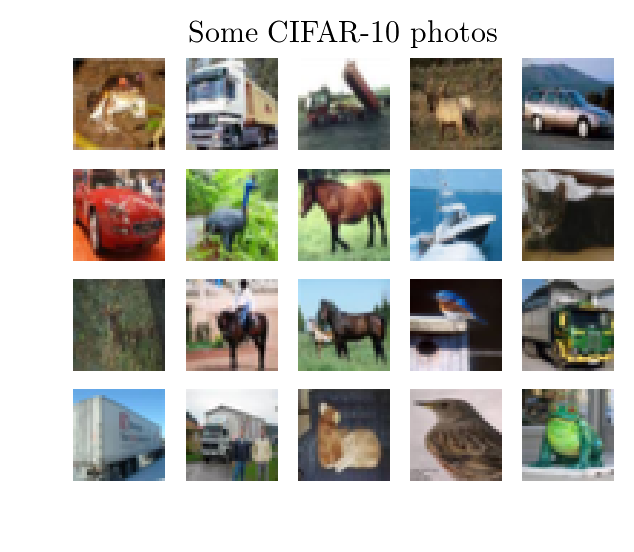

In [8]:
subset = data_train[0:20,:]/255.

nrows = 4
ncols = 5


plt.figure(figsize=(ncols*0.7, nrows*0.7))

for i in range(nrows*ncols):
    if (i==3):
        plt.title("Some CIFAR-10 photos")
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(subset[i])
    plt.axis('off')
    
plt.axis('off')
plt.show()

### b) Classify using the original network

In [16]:
# build the  original model
model = keras.models.Sequential()
model.add(keras.layers.InputLayer((32,32,3)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=1024, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer=tf.train.AdadeltaOptimizer(0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(x=train_set[0], y=train_set[1],
          epochs=18, batch_size=16,
          shuffle=True,
          validation_data=val_set)

Train on 50000 samples, validate on 10000 samples
Epoch 1/18
50000/50000 [==============================] - 121s 2ms/step - loss: 1.9912 - acc: 0.2837 - val_loss: 1.8483 - val_acc: 0.3694
Epoch 2/18
50000/50000 [==============================] - 128s 3ms/step - loss: 1.7283 - acc: 0.3859 - val_loss: 1.7345 - val_acc: 0.4015
Epoch 3/18
50000/50000 [==============================] - 125s 3ms/step - loss: 1.6384 - acc: 0.4163 - val_loss: 1.6431 - val_acc: 0.4285
Epoch 4/18
50000/50000 [==============================] - 207s 4ms/step - loss: 1.5791 - acc: 0.4376 - val_loss: 1.5624 - val_acc: 0.4615
Epoch 5/18
50000/50000 [==============================] - 216s 4ms/step - loss: 1.5363 - acc: 0.4513 - val_loss: 1.5197 - val_acc: 0.4790
Epoch 6/18
50000/50000 [==============================] - 200s 4ms/step - loss: 1.4953 - acc: 0.4658 - val_loss: 1.4691 - val_acc: 0.4895
Epoch 7/18
50000/50000 [==============================] - 114s 2ms/step - loss: 1.4631 - acc: 0.4800 - val_loss: 1.4438 - 

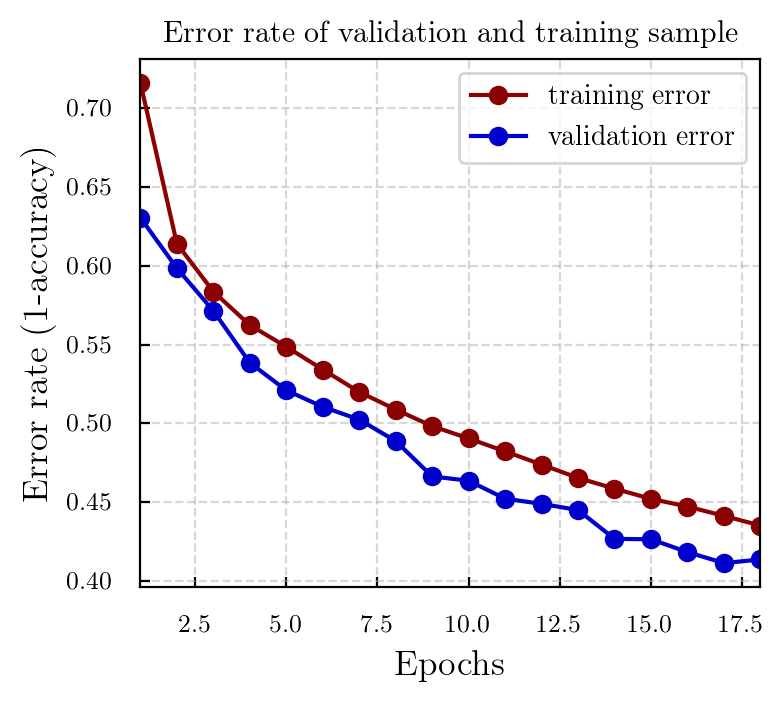

In [18]:
Epochs = np.arange(1,19,1)
history_dict = model.history.history

train_acc = history_dict['acc']
test_acc = history_dict['val_acc']
train_err = 1.0 - np.asarray(train_acc)
test_err = 1.0 - np.asarray(test_acc)

plt.figure(figsize=(4, 3.5))

plt.plot(Epochs, train_err, c = 'darkred', marker='o',label='training error')
plt.plot(Epochs, test_err , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Epochs', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,18)

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

In [20]:
model.evaluate(val_set[0], val_set[1])

10000/10000 [==============================] - 5s 456us/step


[1.1906831010818482, 0.5864]

We get an accuracy of $\sim 0.5864$ in the validation set.

Let's construct a deeper network. I will train on the smaller set now, to speed up the procedure.

Let's plot the first layer filters

In [33]:
from tensorflow.keras import backend as K

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255.
    x = np.clip(x, 0 , 255).astype('uint8')
    return x

In [34]:
def generate_pattern(layer_name, filter_index, size=32):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input],[loss,grads])
    input_img_data = np.random.random((1,size,size,3))*20 + 128.
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value*step
        
    img = input_img_data[0]
    return deprocess_image(img)

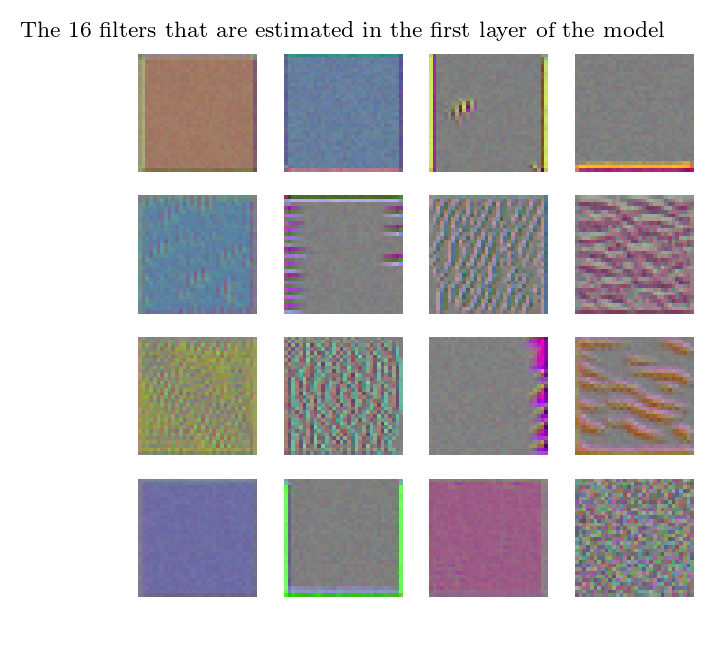

In [37]:
nrows = 4
ncols = 4

plt.figure(figsize=(ncols*0.9, nrows*0.9))
for i in range(nrows*ncols):
    if (i==2):
        plt.title('The 16 filters that are estimated in the first layer of the model', fontsize=8)
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(generate_pattern('conv2d',i))
    plt.axis('off')
       
plt.show()


### c) 

In [31]:
# build the  original model
model_1 = keras.models.Sequential()
model_1.add(keras.layers.InputLayer((32,32,3)))
model_1.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(keras.layers.MaxPool2D())
model_1.add(keras.layers.Dropout(rate=0.4))
model_1.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(keras.layers.MaxPool2D())
model_1.add(keras.layers.Dropout(rate=0.4))
model_1.add(keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model_1.add(keras.layers.MaxPool2D())
model_1.add(keras.layers.Dropout(rate=0.4))
model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(units=1024, activation='relu'))
model_1.add(keras.layers.Dense(units=10, activation='softmax'))
model_1.compile(optimizer=tf.train.AdadeltaOptimizer(0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        9280      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 64)          102464    
__________

The model has $1,172,042$ parameters.

In [40]:
model_1.fit(x=train_set[0], y=train_set[1],
          epochs=18, batch_size=16,
          shuffle=True,
          validation_data=val_set)

Train on 50000 samples, validate on 10000 samples
Epoch 1/18
50000/50000 [==============================] - 179s 4ms/step - loss: 1.6812 - acc: 0.3931 - val_loss: 1.8120 - val_acc: 0.3485
Epoch 2/18
50000/50000 [==============================] - 177s 4ms/step - loss: 1.6131 - acc: 0.4193 - val_loss: 1.6419 - val_acc: 0.4300
Epoch 3/18
50000/50000 [==============================] - 166s 3ms/step - loss: 1.5628 - acc: 0.4385 - val_loss: 1.5855 - val_acc: 0.4423
Epoch 4/18
50000/50000 [==============================] - 153s 3ms/step - loss: 1.5177 - acc: 0.4547 - val_loss: 1.5816 - val_acc: 0.4320
Epoch 5/18
50000/50000 [==============================] - 147s 3ms/step - loss: 1.4803 - acc: 0.4699 - val_loss: 1.4794 - val_acc: 0.4803
Epoch 6/18
50000/50000 [==============================] - 139s 3ms/step - loss: 1.4494 - acc: 0.4810 - val_loss: 1.4930 - val_acc: 0.4724
Epoch 7/18
50000/50000 [==============================] - 149s 3ms/step - loss: 1.4168 - acc: 0.4885 - val_loss: 1.4028 - 

In [41]:
model_1.evaluate(val_set[0], val_set[1])

10000/10000 [==============================] - 9s 915us/step


[1.1472337718963623, 0.5997]

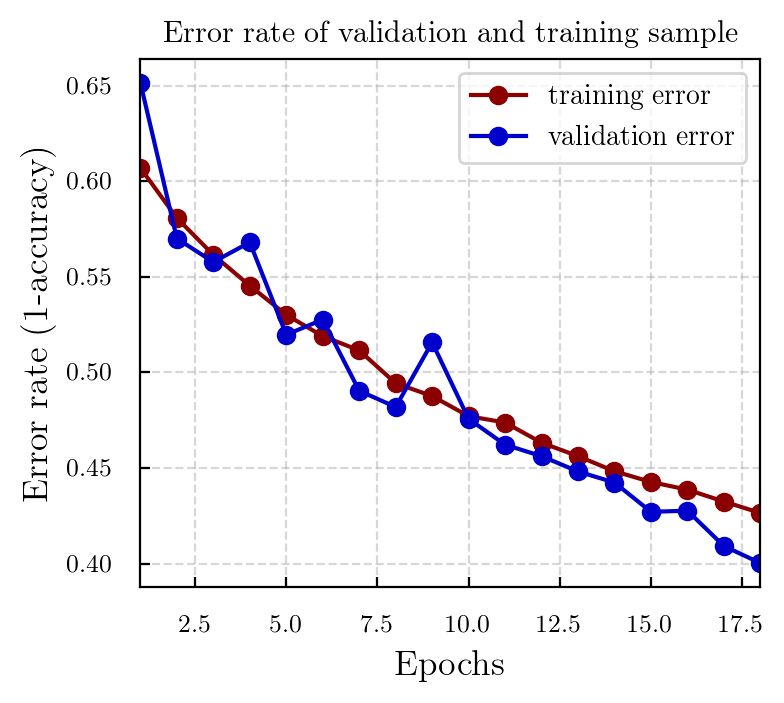

In [42]:
Epochs = np.arange(1,19,1)
history_dict = model_1.history.history

train_acc = history_dict['acc']
test_acc = history_dict['val_acc']
train_err = 1.0 - np.asarray(train_acc)
test_err = 1.0 - np.asarray(test_acc)

plt.figure(figsize=(4, 3.5))

plt.plot(Epochs, train_err, c = 'darkred', marker='o',label='training error')
plt.plot(Epochs, test_err , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Epochs', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,18)

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

We have a slight improvement. Now, after 18 epochs the accuracy is $0.5997$. (It was $0.5864$).